# 手寫阿拉伯數字辨識+DNN

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [2]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：Build model(CNN + FC)

In [3]:
from tensorflow.keras import layers
import numpy as np

input_shape =(28,28,1)

x_train_norm = np.expand_dims(x_train_norm, -1)
x_test_norm = np.expand_dims(x_test_norm, -1) #------->增加一維在最後


model = tf.keras.models.Sequential([
  tf.keras.Input(shape=input_shape),

  layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),

  layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),

  layers.Conv2D(128, kernel_size=(3,3), activation='relu'), #------->每增加一層,filters數增加一倍
  layers.MaxPooling2D(pool_size=(2,2)),                  

  tf.keras.layers.Flatten(),#input_shape=(28, 28)
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：train

In [5]:
# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 21s 13ms/step - loss: 0.2586 - accuracy: 0.9185 - val_loss: 0.0831 - val_accuracy: 0.9748
Epoch 2/5
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0813 - accuracy: 0.9749 - val_loss: 0.0655 - val_accuracy: 0.9820
Epoch 3/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0607 - accuracy: 0.9812 - val_loss: 0.0652 - val_accuracy: 0.9805
Epoch 4/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0538 - val_accuracy: 0.9837
Epoch 5/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0449 - val_accuracy: 0.9878


In [6]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 步驟7：Evaluate

In [7]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=1)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9883
loss: 0.0394
accuracy: 0.9883


## 步驟8：評估，暫不進行

## 步驟9：模型佈署(可略)

In [8]:
# 模型存檔
model.save('model.h5')

# 模型載入
model = tf.keras.models.load_model('model.h5')

d:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 27: invalid start byte

## 步驟10：Predict


線上繪圖網站：https://canvas.apps.chrome/

In [ ]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = 'img/4.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

(985, 2048)
1/1 [==============================] - 0s 18ms/step
[4]


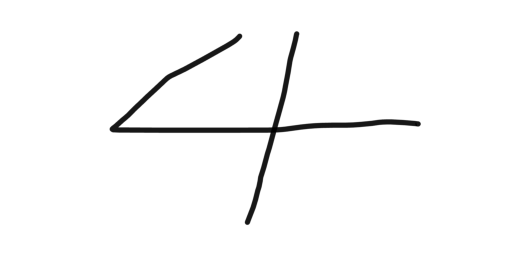

In [ ]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.show()

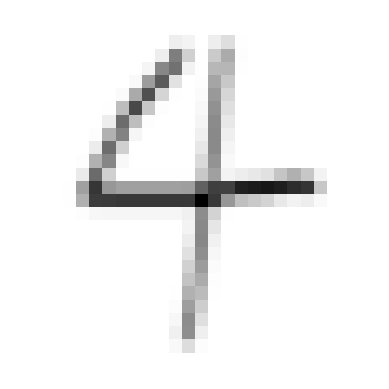

In [ ]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image_resized, cmap='gray')
plt.axis('off')
plt.show()

## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [ ]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2